# PART I

## Some Imports

In [9]:
import numpy as np
import warnings
import matplotlib.pyplot as plt

from keras.datasets import mnist

warnings.filterwarnings('ignore')

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

idx = np.random.permutation(len(X_train))  # Get a portion of the data with random
X_train_subset = X_train[idx][:1000]

In [11]:
print('MNIST Dataset Shape:\n')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('Y_test:  ' + str(y_test.shape))
print('X_train_subset: ' + str(X_train_subset.shape))

MNIST Dataset Shape:

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
X_train_subset: (1000, 28, 28)


In [12]:
# from sklearn.datasets import load_digits, load_iris
# data = load_digits()
# data = load_iris()
# X = data.data
# y = data.target

### For an images has 28x28 pixels = 784px. So reshape 2 dimension.

In [13]:
X_train_subset = X_train_subset.reshape(1000, 784)
X_train_subset = X_train_subset.astype('float32')  # Change integers to 32-bit floating point numbers
print("Training matrix shape", X_train_subset.shape)

Training matrix shape (1000, 784)


In [14]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)
        

In [15]:
def pca(X_train_subset):
    mean, weights, vectors = None, None, None
    X = X_train_subset  # Data

    # Project the data onto the 4 primary principal components
    pca = PCA(4)
    pca.fit(X)
    X_projected = pca.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1 = X_projected[:, 0]
    x2 = X_projected[:, 1]
    plt.scatter(x1, x2, edgecolor="none", alpha=0.8)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar()
    plt.show()
    
    x3 = X_projected[:, 2]
    x4 = X_projected[:, 3]
    plt.scatter(x3, x4, edgecolor="none", alpha=0.8)
    plt.xlabel("Principal Component 3")
    plt.ylabel("Principal Component 4")
    plt.colorbar()
    plt.show()

    return mean, weights, vectors

Shape of X: (1000, 784)
Shape of transformed X: (1000, 4)


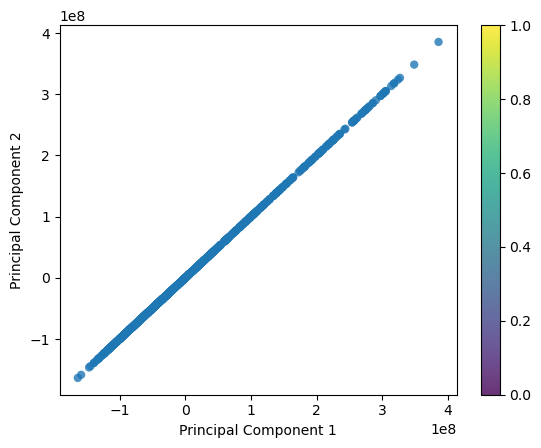

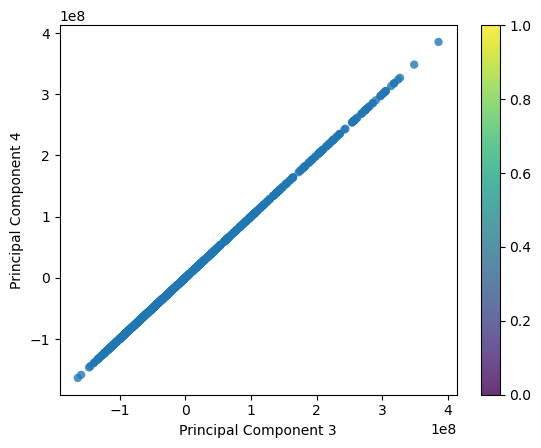

(None, None, None)

In [16]:
pca(X_train_subset)